In [18]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm_notebook as tqdm

In [25]:
%%time
n = 300
def getK(n):
    count = 0
    s = set()
    while(True):
        x = np.random.randint(0, n)
        s.add(x)
        count += 1
        if len(s) >= n:
            return count
getK(n)

Wall time: 6.98 ms


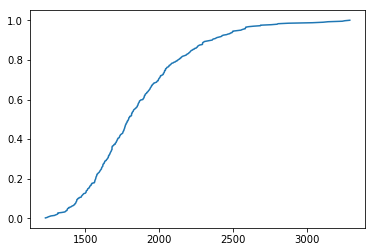

Wall time: 1.79 s


In [27]:
%%time
m = 400

count = []
count_trials = []
cumulative = [0 for i in range(m)]
fraction = [0 for i in range(m)]

for i in range(m):
    k = getK(n)
    count_trials.append(k)
    count.append(1)
single_end_time = time.time()

d = {'k': count_trials, 'count': count, 
     'cumulative': cumulative, 'Fraction': fraction}
df = pd.DataFrame(data = d)
df2 = df.sort_values(by = ['k'])
#df.groupby(by = ['k'])
np_df = df2.as_matrix()
np_df = np_df.astype(float)

for ind, rows in enumerate(np_df):
    if ind != 0:
        rows[2] = rows[1] + np_df[ind-1][2]
        rows[0] = float(rows[2]) / float(m)
    else:
        rows[2] = 1
        rows[0] = float(rows[2]) / float(m)

x = np_df[:,-1] #k
y = np_df[:, 0] #Cumulative Distribution

plt.plot(x, y)
plt.show()

In [28]:
ksum = df2.sum()['k']
estimate = ksum /float(m)
    
print(
    'The expected number of k is {}'
      .format(estimate))

The expected number of k is 1862.065


In [29]:
N = [500, 1000, 5000, 10000, 20000]
M = [400, 1000, 2500, 5000]
def getTime(N, m):
    times = []
    for n in tqdm(N):
        start_time = time.time()
        for i in range(m):
            k = getK(n)
        time_taken = time.time() - start_time        
        times.append(time_taken)
    return times

delay = []
    
for m in tqdm(M):
    d1 = getTime(N,m)
    delay.append(d1)

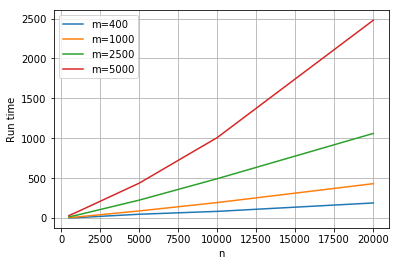

In [31]:
plt.plot(N,  delay[0], label='m={}'.format(M[0]))
plt.plot(N,  delay[1], label='m={}'.format(M[1]))
plt.plot(N,  delay[2], label='m={}'.format(M[2]))
plt.plot(N,  delay[3], label='m={}'.format(M[3]))
plt.xticks = N
plt.legend()
plt.grid()
plt.ylabel("Run time", fontsize = 10)
plt.xlabel("n", fontsize = 10)
plt.show()